In [1]:
# this is to plot inside the notebook
%matplotlib inline

# these are the libraries we are going to use
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# we are also going to use helper functions from the RM1985.py file
from RM1985 import *

matplotlib.style.use('seaborn-v0_8-notebook')

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2222)

# Asssignment 1 Part 1

In this part of the assignment, we're going to replicate Rumelhart and McClelland RM (1985)'s model of the past tense (pictured below).
If you're itching to read the source paper, it's included in the Assignment 1 directory and may be a handy reference. We're going to walk through the necessary components here.

![](images/modelStructure.png)


## Encoding the input

Recall from lecture, the model uses a phonological representation called wickelfeatures. 

Words (e.g., came) are translated into phonemes (e.g., kAm).

Phonemes are converted into a binary code based on their articulatory features (see below).
Remember that in RM's model we use wickelphones (triplets of phonemes; e.g., #kA, kAm, Am#).

In [2]:
word_to_wickelphone('kAm')

[['0000000000', '1001000101', '0010110010'],
 ['1001000101', '0010110010', '1000110010'],
 ['0010110010', '1000110010', '0000000000']]

In practice, we also add a bit representing if a wickelphone touches a word boundary, resulting in an 11 bit code for each phoneme. You will not need the specifics of the code for this assignment.

Wickelphones are converted into wickelfeatures by taking one of the bits from the first phoneme in a wickelphone, one of the bits from the second phoneme, and one of the bits from the third. In theory then, there are 11 * 11 * 11 possible wickelfeatures. However, in practice a lot of these combinations are redundant and we can represent all informative combinations with just 460 wickelfeatures. If you're really itching for the details they're in the paper.

Luckily, we have a helper function that will do all of this encoding for us: `activate_word`

In [3]:
activate_word('kAm')

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,


We should check some properties of our encoding function. 

In order to do this we first have to translate some words (e.g., came) into phonemes (e.g. kAm). 

A lot of letters in English map directly onto their phoneme (e.g., b -> b) however, there are a few that don't (e.g., c as in *car* is represented by a k). The table below should help you translate words into phonemes (particularly the caption helps with vowels):

![](images/IPA.png)

<div class="alert alert-info" role="alert">
<h1>Exercise 1a)</h1>
<p>
Let's translate the ten high frequency words used in the paper: 

come/came, look/looked, feel/felt, have/had, make/made, get/got, give/gave, take/took, go/went, like/liked

(Points 3)
</p>
</div>



In [4]:
# save the phoneme representations of the base verb and past tense verb here
# keep the order in the quetion above: come, look, feel, have, make, get, give, take, go, like
# high_frequency_verbs = ['come', 'look', 'feel', 'have', 'make', 'get', 'give', 'take', 'go', 'like']
# base_high_frequency_verbs = ['k*m', 'luk', ...]
# past_high_frequency_verbs = ['kAm', 'lukt', ...]


# YOUR CODE HERE
high_frequency_verbs = ['come', 'look', 'feel', 'have', 'make', 'get', 'give', 'take', 'go', 'like']
base_high_frequency_verbs = ['k*m', 'luk', 'fEl', 'hav', 'mAk', 'get', 'giv', 'tAk', 'go', 'lIk']
past_high_frequency_verbs = ['kAm', 'lukt', 'felt', 'had', 'mAd', 'got', 'gAv', 'tuk', 'went', 'likt']



In [5]:
"""Check that translation was correct"""
for i, w in enumerate(high_frequency_verbs):
    print(w, 'Base:', activate_word(base_high_frequency_verbs[i]) == base_HF_activations[i])
    print(w, 'Past:', activate_word(past_high_frequency_verbs[i]) == past_HF_activations[i])

    

come Base: True
come Past: True
look Base: True
look Past: True
feel Base: True
feel Past: True
have Base: True
have Past: True
make Base: True
make Past: True
get Base: True
get Past: True
give Base: True
give Past: True
take Base: True
take Past: True
go Base: True
go Past: True
like Base: True
like Past: True


Now let's check some properties of our encoding function: `activate_word`

As mentioned above, there should be 460 wickelfeatures for each word. We can check this using `np.shape`

For a three phoneme word like *came*, we expect there to be at most 16 active wickelfeatures.

<div class="alert alert-info" role="alert">
<h1>Exercise 1b)</h1>
<p>
    
Store the shape of the wickelfeature represetation for *came* and the number of wickelfeatures activated (i.e., set to 1).
    
(Points 2)
    
</p>
</div>


In [6]:
# compute the shape and the number of active wickelfeatures here
# came_activation = np.array(activate_word('kAm'))
# came_shape = ...
# came_number_active_wickelfeatures = ...

came_activation = np.array(activate_word('kAm'))

# YOUR CODE HERE
came_shape = came_activation.shape
came_number_active_wickelfeatures = np.sum(came_activation == 1)

In [7]:
"""Check the shape and number of active wickelfeatures is correct"""
assert(came_shape == (460,))
assert(came_number_active_wickelfeatures == 16)

 ## The Model
 
 Now that we have our input representations, we can work on the model implementation.
 
The goal of RM's model is to output a wickelfeature representation for the past tense of the input verb. To do this, they build a perceptron for each of the 460 possible wickelfeatures. Each perceptron receieves the entire phonological representation of the base verb as input and decides if a single wickelfeature should be present in the output.

We have implemented the standard percepton model for you; however, there is one difference between a standard perceptron and the one's used by RM.

In the standard perceptron, a unit fires if the weighted activation `net` is greater than a threshold `theta`; otherwise it does not fire.

In RM's perceptron, a unit fires probabilistically according to the activation function:

$$ p(\text{fire}; net, \theta, T) =  \frac{1}{1 + e^{-(net-\theta)/T}} $$


<div class="alert alert-info" role="alert">
<h1>Exercise 2a)</h1>
<p>
Translate this function into code.

(Points 2)
</p>
</div>

Hint: the exponential function can be calculated using `np.exp()`


In [8]:
# translate the function here
#
# def rm_activation_function(net, theta, T=1.0):
#     # YOUR CODE HEREs
#     # probability = ...
#     return probability

# YOUR CODE HERE
def rm_activation_function(net, theta, T=1.0):
    probability = 1 / (1 + np.exp(-(net - theta) / T))
    return probability

In [9]:
"""Check the functions output"""
assert(rm_activation_function(0, 0.0) == 0.5)
assert(rm_activation_function(1., 0., 1.0) == 0.7310585786300049)
assert(rm_activation_function(2., 1., T=2.) == 0.6224593312018546)



At first glance, this function looks very similar to the logit function we talked about in week 3's tutorial but what does that `T` parameter do? 

Let's vizualize it.

<div class="alert alert-info" role="alert">
<h1>Exercise 2b)</h1>
<p>
    
Let's set `theta = 0.0` and plot the probability of firing as a function of the the weighted activation `net` at `T=1.0`, `T=0.5` and `T=2.0` in one figure. We should consider weighted activation values between -5 and 5.

(Points 5)
    
</p>
</div>

For full credit you should:

- Plot the probability of firing (Y-axis) as a function of weighted activation, net, (X-axis) on the same plot (choose distinguishable colors please).
- Set labels for both axes.
- Set a title for the figure.
- Set the plot to span (0, 1) for the y-axis and and (-5, 5) for the x-axis
- Set a legend indicating how colors map to values of T


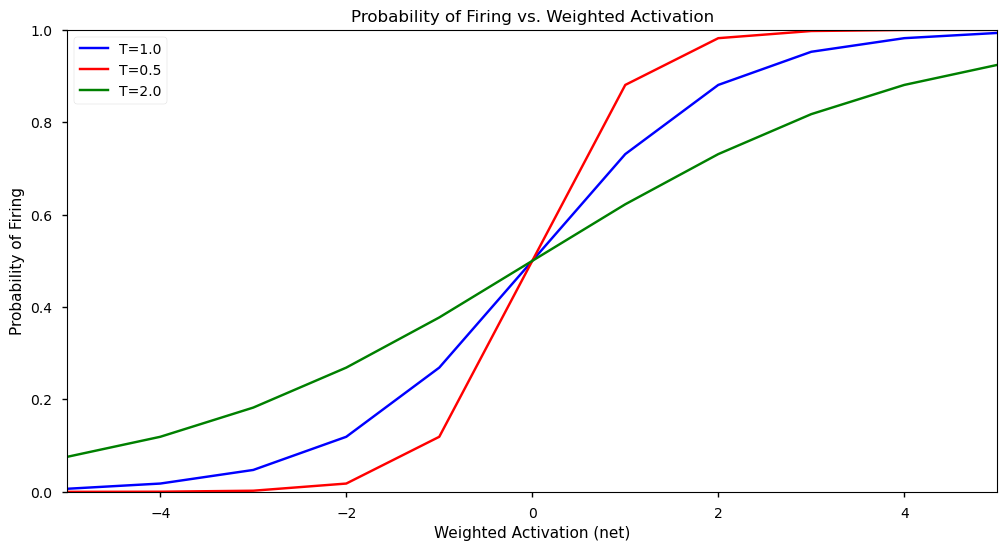

In [10]:
# calculate and plot the probability of firing at different T values
# 
# net_activation = np.arange(-5, 6)
# p_T1 = rm_activation_function(net_activation, theta=0.0, T=1.0)
# p_T05 = ...
# p_T2 = ...
#

# YOUR CODE HERE
net_activation = np.arange(-5,6)
p_T1 = rm_activation_function(net_activation, theta=0.0, T=1.0)
p_T05 = rm_activation_function(net_activation, theta=0.0, T=0.5)
p_T2 = rm_activation_function(net_activation, theta=0.0, T=2.0)

plt.figure(figsize=(12, 6))

plt.plot(net_activation, p_T1, label='T=1.0', color='blue')
plt.plot(net_activation, p_T05, label='T=0.5', color='red')
plt.plot(net_activation, p_T2, label='T=2.0', color='green')

plt.title('Probability of Firing vs. Weighted Activation')
plt.xlabel('Weighted Activation (net)')
plt.ylabel('Probability of Firing')

plt.xlim(-5, 5)
plt.ylim(0, 1)

plt.legend()

<div class="alert alert-info" role="alert">
<h1>Exercise 2c)</h1>
<p>
Discuss how this activation function differs from the standard perceptron activation function. (max 5 sentences)

(Points 2)
</p>
</div>



Answer:  
The standard perceptron activation function is a step function that operates on a binary threshold basis, where a unit fires (outputs a value of 1) if the weighted input sum (net) exceeds a certain threshold (theta), and does not fire (outputs a value of 0) otherwise. In contrast, the activation function described in this exercise resembles a sigmoid function, which allows for probabilistic firing. Instead of a binary outcome, it outputs a continuous value between 0 and 1, representing the probability that a unit will fire given the net input. 

# U Shaped Curves

Recall from lecture that RM used this model to demonstrate a developmental U-shape curve.

First they trained the model on ten high frequency words (8 irregular, 2 regular), then medium frequency verbs, then low frequency verbs. They then plotted the percent of wickelfeatures the model correctly predicted for irregular and regular verbs as the model saw more data. 

Let's replicate this step by step :)

First, let's load in a corpus of English verbs.

In [11]:
# read in the corpus

verbs = []
with open('verbs.csv') as f:
    for i, line in enumerate(f.readlines()):
        if i == 0:
            print(line.strip('\n').split(','))
        else:
            verbs.append(line.strip('\n').split(','))
            print(verbs[-1])

# add in the high frequency verbs you translated for us earlier
for i, word in enumerate(high_frequency_verbs):
    if word in ['look', 'like']:
        verbs.append([word, 'Regular', base_high_frequency_verbs[i], past_high_frequency_verbs[i], 'H'])
    else:
        verbs.append([word, 'Irregular', base_high_frequency_verbs[i], past_high_frequency_verbs[i], 'H'])
    print(verbs[-1])


['Verb', 'Type', 'Base', 'Past', 'Frequency']
['act', 'Regular', 'akt', 'akted', 'M']
['age', 'Regular', 'Aj', 'Ajd', 'M']
['air', 'Regular', 'Ar', 'Ard', 'M']
['arise', 'Irregular', '*rIz', '*rOz', 'M']
['ask', 'Regular', 'ask', 'askt', 'M']
['back', 'Regular', 'bak', 'bakt', 'M']
['bear', 'Irregular', 'bAr', 'bor', 'M']
['beat', 'Irregular', 'bEt', 'bEt', 'M']
['become', 'Irregular', 'bEk*m', 'bEkAm', 'M']
['believe', 'Regular', 'b*lEv', 'b*lEvd', 'M']
['bend', 'Irregular', 'bend', 'bent', 'L']
['bid', 'Irregular', 'bid', 'bid', 'L']
['bleed', 'Irregular', 'blEd', 'bled', 'M']
['blow', 'Irregular', 'blO', 'blU', 'M']
['board', 'Regular', 'bord', 'borded', 'M']
['brake', 'Irregular', 'brAk', 'brOk', 'M']
['breed', 'Irregular', 'brEd', 'bred', 'L']
['bring', 'Irregular', 'briN', 'brot', 'M']
['brown', 'Regular', 'brWn', 'brWnd', 'L']
['build', 'Irregular', 'bild', 'bilt', 'M']
['buy', 'Irregular', 'bI', 'bot', 'M']
['call', 'Regular', 'kol', 'kold', 'M']
['carp', 'Regular', 'karp', 'ka

- The first column denotes the verb.
- The second column denotes whether the verb is regular or irregular.
- The third column denotes the phoneme representation of the base verb.
- The fourth column denotes the phoneme representation of the past tense verb.
- The last column denotes the verb's frequency (M: Medium or L: Low)

## First Stage: High Frequency Verbs

In the first stage, RM trained the model on the high frequency verbs.

Let's do that.

First we need to convert the phonemes into wickelfeatures.

In [12]:
base_wickel_HF = np.array([activate_word(w) for w in base_high_frequency_verbs]).T
past_wickel_HF = np.array([activate_word(w) for w in past_high_frequency_verbs]).T

Next we initialize a perceptron with our custom activation function

In [13]:
percept = Perceptron(active=rm_activation_function)

Now let's do the perceptron learning algorithm for each high frequency word (i.e. one epoch).

By default, the `Perceptron.learn()` will return the model accuracy on the data, which we measure as the percentage of the wickelfeatures the model correctly predicts.

In [14]:
percept.learn(base_wickel_HF, past_wickel_HF)

array([0.97173913, 0.94782609, 0.93695652, 0.97173913, 0.95652174,
       0.96956522, 0.95      , 0.96304348, 0.84347826, 0.93043478])

We can also score the perceptron, using `Perceptron.score()`. 

In [15]:
percept.score(base_wickel_HF, past_wickel_HF)

array([0.9673913 , 0.95434783, 0.94347826, 0.9673913 , 0.95869565,
       0.97391304, 0.9673913 , 0.96304348, 0.87173913, 0.92826087])

So after one epoch, the perceptron performs well on the verbs it has seen already. 

How will the perceptron perform on all the irregular and regular verbs, including the ones it has not seen yet?

<div class="alert alert-info" role="alert">
<h1>Exercise 3a)</h1>
<p>
    
Now let's divide the corpus `verbs` into two lists: one for regular verbs and one for irregular verbs.

(Points 2)
    
</p>
</div>

Hint: You may want to use a `for` loop over `verbs`


In [16]:
# store the two sets here
#
# regular_verbs = ...
# irregular_verbs = ...

# YOUR CODE HERE
regular_verbs = []
irregular_verbs = []

for verb_details in verbs:
    if verb_details[1] == 'Regular':
        regular_verbs.append(verb_details)
    elif verb_details[1] == 'Irregular':
        irregular_verbs.append(verb_details)

In [17]:
assert(len(regular_verbs) == 96)
assert(len(irregular_verbs) == 96)

Now let's score the perceptron's performance on both the regular and irregular verbs.

<div class="alert alert-info" role="alert">
<h1>Exercise 3b)</h1>
<p>
First convert the phonemes for base and past tense into wickelfeatures. Then calculate the mean score of the model on irregular and regular verbs.
    
(Points 3)</p>
</div>

Hint: Look back to how we coverted phonemes into wickelfeatures above.


In [18]:
# convert irregular and regular verbs into wickelfeatures
#
# base_wickel_irregular = ...
# past_wickel_irregular = ...
# base_wickel_regular = ...
# past_wickel_regular = ...
#
# irregular_score = np.mean(percept.score(base_wickel_irregular, past_wickel_irregular))
# regular_score = np.mean(percept.score(base_wickel_irregular, past_wickel_irregular))

# YOUR CODE HERE
base_regular = []
past_regular = []

for verb_details in regular_verbs:
    base_regular.append(verb_details[2])
    past_regular.append(verb_details[3])
    
base_irregular = []
past_irregular = []

for verb_details in irregular_verbs:
    base_irregular.append(verb_details[2])
    past_irregular.append(verb_details[3])
    

base_wickel_regular = np.array([activate_word(w) for w in base_regular]).T
past_wickel_regular = np.array([activate_word(w) for w in past_regular]).T

base_wickel_irregular = np.array([activate_word(w) for w in base_irregular]).T
past_wickel_irregular = np.array([activate_word(w) for w in past_irregular]).T

irregular_score = np.mean(percept.score(base_wickel_irregular, past_wickel_irregular))
regular_score = np.mean(percept.score(base_wickel_regular, past_wickel_regular))

print(irregular_score)
print(regular_score)

0.9142889492753623
0.8748188405797102


In [19]:

assert(irregular_score == 0.9142889492753623)
assert(regular_score == 0.8748188405797102)

So far we've trained the model in batch, which means it has seen all the data once before we score it.

Let's train the model one data point at a time and score it after each datapoint

In [20]:
# Let's initialize a new perceptron with our custom activation function
percept = Perceptron(active=rm_activation_function)


# Now let's loop through each data point to train and score
scores_regular = []
scores_irregular = []
for i in range(len(high_frequency_verbs)):
    percept.learn(base_wickel_HF[:,i, np.newaxis], past_wickel_HF[:,i,np.newaxis])
    scores_regular.append(np.mean(percept.score(base_wickel_regular, past_wickel_regular)))
    scores_irregular.append(np.mean(percept.score(base_wickel_irregular, past_wickel_irregular)))
    print(scores_regular[-1], scores_irregular[-1])


0.6128396739130434 0.6086050724637682
0.6739583333333333 0.6753396739130434
0.7203577898550725 0.7194972826086957
0.7453577898550724 0.7426177536231884
0.7697463768115943 0.7745471014492754
0.7841485507246378 0.7931385869565216
0.7971693840579709 0.8102355072463768
0.8057291666666666 0.8263813405797102
0.8115489130434783 0.8335371376811594
0.8201766304347826 0.8421875000000001


<div class="alert alert-info" role="alert">
<h1>Exercise 3c)</h1>
<p>
Explain the model output. So far, do we replicate RM? Do we expect to get the same result if we rerun the model? (7 sentences max)
    
(Points 3)</p>
</div>

Answer:  
The model output consists of two lists of scores: scores_regular and scores_irregular, which represents the model's accuracy on regular and irregular verbs, respectively, after each training step. These scores appear to be increasing, indicating that as the model sees more data, it's getting better at predicting the correct forms. This replicates RM's model so far. We would expect the same result if we rerun the model because the learning algorithm is deterministic.

## Second Stage: Medium Frequency Verbs

Recall, in the second stage of the U-Shape curve, RM train the model with medium frequency verbs. Let's do it!

<div class="alert alert-info" role="alert">
<h1>Exercise 4a)</h1>
<p>
    
First, we need to extract the medium frequency verbs from the corpus `verbs`.
    
(Points 1)
    
</p>
</div>


In [21]:
# store the medium frequency verbs here
#
# base_med_frequency_verbs = ...
# past_med_frequency_verbs = ...

# YOUR CODE HERE
base_med_frequency_verbs = []
past_med_frequency_verbs = []

for verb_details in verbs:
    if verb_details[4] == 'M':
        base_med_frequency_verbs.append(verb_details[2])
        past_med_frequency_verbs.append(verb_details[3])

In [22]:
assert(len(base_med_frequency_verbs) == 150)
assert(len(past_med_frequency_verbs) == 150)

<div class="alert alert-info" role="alert">
<h1>Exercise 4b)</h1>
<p>
Second, we need to convert those those verbs into wickelfeatures.
    
(Points 2)</p>
</div>


In [23]:
# convert the verbs into wickelfeatures
#
# base_wickel_MF = ...
# past_wickel_MF = ...

# YOUR CODE HERE
base_wickel_MF =  np.array([activate_word(w) for w in base_med_frequency_verbs]).T
past_wickel_MF =  np.array([activate_word(w) for w in past_med_frequency_verbs]).T

Now, we need to loop through each data point to train and score, like we just did for the high frequency verbs.

<div class="alert alert-info" role="alert">
<h1>Exercise 4c)</h1>
<p>
    
Calculate and store the scores for regular and irregular verbs in the variables `scores_irregular_md` and `scores_regular_md`.
    
(Points 2)
    
</p>
</div>


In [24]:
# loop through the medium frequency verbs to train and score the model here
#
# scores_regular_md = []
# scores_irregular_md = []
# for i in range(len(base_med_frequency_verbs)):
#    # YOUR CODE HERE
#    print(scores_regular_md[-1], scores_irregular_md[-1])

# YOUR CODE HERE
scores_regular_md = []
scores_irregular_md = []

for i in range(len(base_med_frequency_verbs)):
    percept.learn(base_wickel_MF[:,i, np.newaxis], past_wickel_MF[:,i,np.newaxis])
    scores_regular_md.append(np.mean(percept.score(base_wickel_regular, past_wickel_regular)))
    scores_irregular_md.append(np.mean(percept.score(base_wickel_irregular, past_wickel_irregular)))
    print(scores_regular_md[-1], scores_irregular_md[-1])

0.8268342391304347 0.8441802536231883
0.8344202898550726 0.8514266304347826
0.8392210144927538 0.8594655797101449
0.8400135869565216 0.8624547101449277
0.8431838768115942 0.8668251811594203
0.8454483695652173 0.8644021739130435
0.8525362318840579 0.8736413043478262
0.8541666666666666 0.8765625
0.8431838768115941 0.8606431159420289
0.8374320652173912 0.8484601449275363
0.8459918478260869 0.8670063405797102
0.8525588768115943 0.8776268115942029
0.8588541666666668 0.8673686594202898
0.8606657608695653 0.8708786231884057
0.8590579710144928 0.877717391304348
0.8642436594202899 0.8889945652173914
0.8668251811594203 0.8891304347826088
0.8712182971014494 0.8941123188405796
0.8591711956521738 0.871988224637681
0.864447463768116 0.8835597826086956
0.8689990942028984 0.8877717391304346
0.8665081521739131 0.8831295289855072
0.8699048913043478 0.8820878623188406
0.8742980072463767 0.8846693840579709
0.8748641304347826 0.8857336956521739
0.8671648550724638 0.8740262681159421
0.8787590579710144 0.881

In [25]:
assert(scores_regular_md[-1] == 0.9333333333333332 )
assert(scores_irregular_md[-1] == 0.9447690217391305)

## Third Stage: Low Frequency Verbs

In the third stage of the U-Shape curve, RM train the model with low frequency verbs. One last time then :)

<div class="alert alert-info" role="alert">
<h1>Exercise 4d)</h1>
<p>
    
First, we need to extract the low frequency verbs from the corpus `verbs`.
    
(Points 1)
    
</p>
</div>

In [26]:
# store the low frequency verbs here
#
# base_low_frequency_verbs = ...
# past_low_frequency_verbs = ...

# YOUR CODE HERE
base_low_frequency_verbs = []
past_low_frequency_verbs = []

for verb_details in verbs:
    if verb_details[4] == 'L':
        base_low_frequency_verbs.append(verb_details[2])
        past_low_frequency_verbs.append(verb_details[3])

In [27]:
assert(len(base_low_frequency_verbs) == 32)
assert(len(past_low_frequency_verbs) == 32)

<div class="alert alert-info" role="alert">
<h1>Exercise 4e)</h1>
<p>
Second, we need to convert those those verbs into wickelfeatures.
    
(Points 2)</p>
</div>


In [28]:
# convert the verbs into wickelfeatures
#
# base_wickel_LF = ...
# past_wickel_LF = ...

# YOUR CODE HERE
base_wickel_LF = np.array([activate_word(w) for w in base_low_frequency_verbs]).T
past_wickel_LF = np.array([activate_word(w) for w in past_low_frequency_verbs]).T

Finally, we need to loop through each data point to train and score.

<div class="alert alert-info" role="alert">
<h1>Exercise 4f)</h1>
<p>
    
Calculate and store the scores for regular and irregular verbs in the variables `scores_irregular_low` and `scores_regular_low`.
    
(Points 2)
</p>
</div>


In [29]:
# loop through the medium frequency verbs to train and score the model here
#
# scores_regular_low = []
# scores_irregular_low = []
# for i in range(len(base_low_frequency_verbs)):
#    # YOUR CODE HERE
#    print(scores_regular_low[-1], scores_irregular_low[-1])

# YOUR CODE HERE
scores_regular_low = []
scores_irregular_low = []

for i in range(len(base_low_frequency_verbs)):
    percept.learn(base_wickel_LF[:,i, np.newaxis], past_wickel_LF[:,i,np.newaxis])
    scores_regular_low.append(np.mean(percept.score(base_wickel_regular, past_wickel_regular)))
    scores_irregular_low.append(np.mean(percept.score(base_wickel_irregular, past_wickel_irregular)))
    print(scores_regular_low[-1], scores_irregular_low[-1])

0.9320652173913043 0.9478940217391304
0.9317708333333332 0.9497735507246375
0.9328577898550724 0.9474864130434782
0.9306385869565217 0.9476902173913043
0.9353940217391304 0.9471240942028986
0.9341485507246375 0.9482110507246376
0.934782608695652 0.9472599637681159
0.933582427536232 0.9479393115942031
0.9344202898550725 0.9483242753623188
0.9350543478260871 0.9482110507246376
0.9323369565217391 0.9505661231884056
0.9377264492753623 0.9491168478260869
0.9384057971014492 0.94861865942029
0.9387907608695653 0.9470788043478261
0.938473731884058 0.9482336956521739
0.9393115942028986 0.9487092391304349
0.9405570652173915 0.9497961956521738
0.9404664855072463 0.9480978260869565
0.9404891304347824 0.9460144927536233
0.9435914855072465 0.9448822463768116
0.9430932971014494 0.9459918478260869
0.9431159420289855 0.9459465579710145
0.9434103260869565 0.9456295289855073
0.9433197463768117 0.943455615942029
0.9435235507246377 0.9455389492753624
0.9445425724637682 0.9468297101449276
0.9426177536231884

In [30]:
assert(scores_regular_low[0] == 0.9320652173913043)
assert(scores_irregular_low[0] == 0.9478940217391304)
assert(scores_regular_low[-1] == 0.9432065217391304)
assert(scores_irregular_low[-1] == 0.9518795289855072)

## Putting it all together

<div class="alert alert-info" role="alert">
<h1>Exercise 5a)</h1>
<p>
Let's see how well we replicated the U-Shape pattern by plotting the simulation output.
    
(Points 5)</p>
</div>

For full credit your code should:

- Plot the percent of correct wickelfeatures (Y-axis) as a function of the amount of datapoints trained on for both regular and irregular verbs (use distinct colors please).
- Plot dashed vertical lines at 10 and 160 data points to demarcate the three different time periods.
- Set labels for both axes.
- Set a title for the figure.
- Set the plot to span (0.5, 1) for the y-axis and and (0, 192) for the x-axis
- Set a legend indicating how colors map to verb type

Hint: to concatenate two lists into a bigger list you can use the following syntax:
`big_list = one_list + another_list`


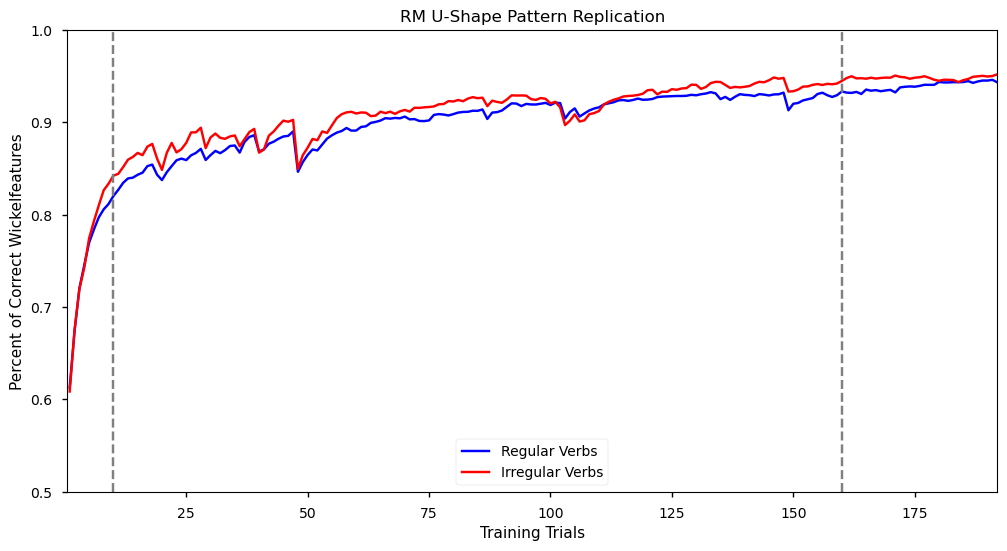

In [31]:
# YOUR CODE HERE
scores_regular_full = scores_regular + scores_regular_md + scores_regular_low
scores_irregular_full = scores_irregular + scores_irregular_md + scores_irregular_low

x_values = list(range(1, len(scores_regular_full) + 1))

plt.figure(figsize=(12, 6))

plt.plot(x_values, scores_regular_full, label='Regular Verbs', color='blue')

plt.plot(x_values, scores_irregular_full, label='Irregular Verbs', color='red')

plt.axvline(x=10, color='grey', linestyle='--')
plt.axvline(x=160, color='grey', linestyle='--')

plt.xlabel('Training Trials')
plt.ylabel('Percent of Correct Wickelfeatures')

plt.title('RM U-Shape Pattern Replication')

plt.xlim(0.5, 192)
plt.ylim(0.5, 1)

plt.legend()

<div class="alert alert-info" role="alert">
<h1>Exercise 5b)</h1>
<p>

1) Did we replicate RM's U-shaped curve? Why or why not? Be specific.

2) Do you believe this model is a fair model of children's acquisition? Why or why not? Be specific.
    
(Points 7)</p>
</div>

For each question make no more than three specific arguments. We will only mark the first three. Feel free to bullet your points. This is not an essay.

1)
- We did replicate RM's U-shaped curve, because the U-shaped behaviour is present at some part of the graph.
- Specifically, the U-shaped learning behaviour is quite noticable and significant for the irregular verbs around 40 to 60 training trials. The U-shape behaviour can be inferred from the initial increase in percent of correct wickelfeatures, followed by a noticable decrease, and then a subsequent increase.
- Some might suggest that our results didn't fully mirror those of RM's experiment because, unlike in the original study where regular verbs showed no U-shaped behavior, our findings for regular verbs does exhibit U-shaped patterns at certain points, for instance around 50 training trials.

2)  
I believe this model is not a fair model of children's acquisition because:
- The training regime is fragile (that is, if we change the training regime, eg. if we don't assume regular and irregular verbs are seperated, the model would fail to generate U-shaped learning curve), while human language laerning is robust (eg. children exhibit similar learning curves, even with vastly different data to learn from).
- The representation in terms of a single block of Wickelfeartures is overly simplified, missing out important aspects of phonology.
- For instance, Wickelfeature representations can't deal with reduplication, can't tell difference between words that sound alike, etc.

# Impress Me

If you have recieved full marks on everything up to here in the assignment, you would have an A (74). If you struggled to make it this far into the assignment, you might consider skipping these next two questions and focusing on the previous questions. These next two questions are less structured and will be marked harder. To reiterate, you can get an A without even attempting these questions.

## Error Analysis

<div class="alert alert-info" role="alert">
<h1>Exercise 6)</h1>
<p>
In this exercise, you need to conduct a more thorough error analysis of RM's model.
On page 22 of the RM source paper, they describe eight different classes of irregular verb.
The goal of this question is to create a similar graph to the one you just made but with individual lines for every type of irregular verb.
    
(Points 13)</p>
</div>

In order to recieve full marks you must,
- Annotate the types of irregular verbs (important: this must be done within this notebook file).
- Run a new instance of the RM perceptron following the same training regime.
- Score the model on each type of irregular verb.
- Plot the learning trajectory for each type of irregular verb.
- Discuss your findings, which means STATE the model output, STATE why the model does it, STATE whether or not you believe it, and STATE why you do/don't believe it (500 words max).

Above all else clarity is imperative. Comment all your code so that we can understand what you are doing. Make sure all your plots are legible. Just as in the real world, if it's brilliant but nobody can understand it, it won't get you anywhere.


In [32]:
# YOUR CODE HERE

## Step 1: Annotate and categorize irregular cerbs into the 8 different classes
irregular_verbs_1 = []
irregular_verbs_2 = []
irregular_verbs_6 = []
irregular_verbs_8 = []

for verb_details in irregular_verbs:
    base, past = verb_details[2], verb_details[3]
    # Class 1: Verbs that do not change at all to form the past tense
    if (base == past):
        irregular_verbs_1.append(verb_details)
    # Class 2: Verbs that change a final /d/ to /t/ to form the past tense
    elif (base.endswith('d') and past.endswith('t')):
        irregular_verbs_2.append(verb_details)
    # Class 6: Verbs that undergo a vowel change of /i/ to /a/, or verbs that undergo an internal vowel change of /i/ or /a/ to /u/
    elif ('i' in base and 'a' in past):
        irregular_verbs_6.append(verb_details)
    elif ('i' in base and 'u' in past):
        irregular_verbs_6.append(verb_details)
    elif ('i' in base and '*' in past):
        irregular_verbs_6.append(verb_details)
    elif ('a' in base and '*' in past):
        irregular_verbs_6.append(verb_details)
    elif ('a' in base and 'u' in past):
        irregular_verbs_6.append(verb_details)
    # Class 8: Verbs that undergo a vowel change and that end in a diphthongal sequence
    elif ('O' in base and 'U' in past):
        irregular_verbs_8.append(verb_details)
        
# I can't think of a way to categorize class 3,4,5,7 with my programming level, so I will add them manually...
# Class 3: Verbs that undergo an internal vowel change and also add a final /t/ or /d/
irregular_verbs_3 = [['creep', 'Irregular', 'krEp', 'krept', 'L'],
                     ['deal', 'Irregular', 'dEl', 'delt', 'M'],
                     ['flee', 'Irregular', 'flE', 'fled', 'M'],
                     ['hear', 'Irregular', 'hEr', 'herd', 'M'],
                     ['keep', 'Irregular', 'kEp', 'kept', 'M'],
                     ['leave', 'Irregular', 'lEv', 'left', 'M'],
                     ['mean', 'Irregular', 'mEn', 'ment', 'M'],
                     ['sell', 'Irregular', 'sel', 'sOld', 'M'],
                     ['sleep', 'Irregular', 'slEp', 'slept', 'M'],
                     ['sweep', 'Irregular', 'swEp', 'swept', 'M'],
                     ['tell', 'Irregular', 'tel', 'tOld', 'M'],
                     ['weep', 'Irregular', 'wEp', 'wept', 'L'],
                     ]

# Class 4: Verbs that undergo an internal vowel change, delete a final consonant, and add a final /t/ or /d/
irregular_verbs_4 = [['bring', 'Irregular', 'briN', 'brot', 'M'],
                     ['buy', 'Irregular', 'bI', 'bot', 'M'],
                     ['catch', 'Irregular', 'kaC', 'kot', 'L'],
                     ['lose', 'Irregular', 'lUz', 'lost', 'M'],
                     ['say', 'Irregular', 'sA', 'sed', 'M'],
                     ['seek', 'Irregular', 'sEk', 'sot', 'M'],
                     ['teach', 'Irregular', 'tEC', 'tot', 'M'],
                     ['think', 'Irregular', 'TiNk', 'Tot', 'M'],
                     ['have', 'Irregular', 'hav', 'had', 'H'],
                     ['make', 'Irregular', 'mAk', 'mAd', 'H'],
                     ]

# Class 5: Verbs that undergo an internal vowel change whose stems end in a dental
irregular_verbs_5 = [['do', 'Irregular', 'dU', 'did', 'M'],
                     ['find', 'Irregular', 'fInd', 'fWnd', 'M'],
                     ['bleed', 'Irregular', 'blEd', 'bled', 'M'],
                     ['feed', 'Irregular', 'fEd', 'fed', 'M'],
                     ['breed', 'Irregular', 'brEd', 'bred', 'L'],
                     ['fight', 'Irregular', 'fIt', 'fot', 'M'],
                     ['grind', 'Irregular', 'grInd', 'grWnd', 'L'],
                     ['hide', 'Irregular', 'hId', 'hid', 'M'],
                     ['hold', 'Irregular', 'hOld', 'held', 'M'],
                     ['lead', 'Irregular', 'lEd', 'led', 'M'],
                     ['meet', 'Irregular', 'mEt', 'met', 'M'],
                     ['mislead', 'Irregular', 'mislEd', 'misled', 'M'],
                     ['read', 'Irregular', 'rEd', 'red', 'M'],
                     ['ride', 'Irregular', 'rId', 'rOd', 'M'],
                     ['shoot', 'Irregular', 'Sut', 'Sot', 'M'],
                     ['stand', 'Irregular', 'stand', 'stUd', 'M'],
                     ['wind', 'Irregular', 'wInd', 'wWnd', 'L'],
                     ['write', 'Irregular', 'rIt', 'rOt', 'M'],
                     ['get', 'Irregular', 'get', 'got', 'H'],
                     ]

# Class 7: All other verbs that undergo an internal vowel change
irregular_verbs_7 = [['arise', 'Irregular', '*rIz', '*rOz', 'M'],
                     ['bear', 'Irregular', 'bAr', 'bor', 'M'],
                     ['become', 'Irregular', 'bEk*m', 'bEkAm', 'M'],
                     ['brake', 'Irregular', 'brAk', 'brOk', 'M'],
                     ['choose', 'Irregular', 'Cuz', 'COz', 'M'],
                     ['drive', 'Irregular', 'jrIv', 'jrOv', 'M'],
                     ['fall', 'Irregular', 'fol', 'fel', 'M'],
                     ['freeze', 'Irregular', 'frEz', 'frOz', 'M'],
                     ['rise', 'Irregular', 'rIz', 'rOz', 'M'],
                     ['run', 'Irregular', 'r*n', 'ran', 'M'],
                     ['see', 'Irregular', 'sE', 'so', 'M'],
                     ['shake', 'Irregular', 'Sak', 'Suk', 'M'],
                     ['speak', 'Irregular', 'spEk', 'spOk', 'M'],
                     ['strike', 'Irregular', 'strIk', 'str*k', 'M'],
                     ['tear', 'Irregular', 'tAr', 'tor', 'L'],
                     ['wear', 'Irregular', 'wAr', 'wor', 'M'],
                     ['come', 'Irregular', 'k*m', 'kAm', 'H'],
                     ['give', 'Irregular', 'giv', 'gAv', 'H'],
                     ['take', 'Irregular', 'tAk', 'tuk', 'H'],
                     ['go', 'Irregular', 'go', 'went', 'H'],
                    ]

## Step 2: Initialize 8 new perceptrons with the same training regime and score each of them on each type/class of irregular verb, respectively.

percept_new1 = Perceptron(active=rm_activation_function)
percept_new2 = Perceptron(active=rm_activation_function)
percept_new3 = Perceptron(active=rm_activation_function)
percept_new4 = Perceptron(active=rm_activation_function)
percept_new5 = Perceptron(active=rm_activation_function)
percept_new6 = Perceptron(active=rm_activation_function)
percept_new7 = Perceptron(active=rm_activation_function)
percept_new8 = Perceptron(active=rm_activation_function)

# categorize each class into base and past phonemes
base_verbs_1 = []
past_verbs_1 = []

for verb_details in irregular_verbs_1:
    base_verbs_1.append(verb_details[2])
    past_verbs_1.append(verb_details[3])
    
base_verbs_2 = []
past_verbs_2 = []

for verb_details in irregular_verbs_2:
    base_verbs_2.append(verb_details[2])
    past_verbs_2.append(verb_details[3])
    
        
base_verbs_3 = []
past_verbs_3 = []

for verb_details in irregular_verbs_3:
    base_verbs_3.append(verb_details[2])
    past_verbs_3.append(verb_details[3])
    
        
base_verbs_4 = []
past_verbs_4 = []

for verb_details in irregular_verbs_4:
    base_verbs_4.append(verb_details[2])
    past_verbs_4.append(verb_details[3])

        
base_verbs_5 = []
past_verbs_5 = []

for verb_details in irregular_verbs_5:
    base_verbs_5.append(verb_details[2])
    past_verbs_5.append(verb_details[3])
    
        
base_verbs_6 = []
past_verbs_6 = []

for verb_details in irregular_verbs_6:
    base_verbs_6.append(verb_details[2])
    past_verbs_6.append(verb_details[3])
    
        
base_verbs_7 = []
past_verbs_7 = []

for verb_details in irregular_verbs_7:
    base_verbs_7.append(verb_details[2])
    past_verbs_7.append(verb_details[3])
    
        
base_verbs_8 = []
past_verbs_8 = []

for verb_details in irregular_verbs_8:
    base_verbs_8.append(verb_details[2])
    past_verbs_8.append(verb_details[3])
    
# now I convert these base and past tense phonemes into wickelfeatures, grouping them according to their class

base_wickel_1 = np.array([activate_word(w) for w in base_verbs_1]).T
past_wickel_1 = np.array([activate_word(w) for w in past_verbs_1]).T

base_wickel_2 = np.array([activate_word(w) for w in base_verbs_2]).T
past_wickel_2 = np.array([activate_word(w) for w in past_verbs_2]).T

base_wickel_3 = np.array([activate_word(w) for w in base_verbs_3]).T
past_wickel_3 = np.array([activate_word(w) for w in past_verbs_3]).T

base_wickel_4 = np.array([activate_word(w) for w in base_verbs_4]).T
past_wickel_4 = np.array([activate_word(w) for w in past_verbs_4]).T

base_wickel_5 = np.array([activate_word(w) for w in base_verbs_5]).T
past_wickel_5 = np.array([activate_word(w) for w in past_verbs_5]).T

base_wickel_6 = np.array([activate_word(w) for w in base_verbs_6]).T
past_wickel_6 = np.array([activate_word(w) for w in past_verbs_6]).T

base_wickel_7 = np.array([activate_word(w) for w in base_verbs_7]).T
past_wickel_7 = np.array([activate_word(w) for w in past_verbs_7]).T

base_wickel_8 = np.array([activate_word(w) for w in base_verbs_8]).T
past_wickel_8 = np.array([activate_word(w) for w in past_verbs_8]).T


# loop through each data point of each class to train and score the models on each class of irregular verb.

scores_class1 = []

for i in range(len(irregular_verbs_1)):
    percept_new1.learn(base_wickel_1[:,i, np.newaxis], past_wickel_1[:,i,np.newaxis])
    scores_class1.append(np.mean(percept_new1.score(base_wickel_irregular, past_wickel_irregular)))
    
scores_class2 = []

for i in range(len(irregular_verbs_2)):
    percept_new2.learn(base_wickel_2[:,i, np.newaxis], past_wickel_2[:,i,np.newaxis])
    scores_class2.append(np.mean(percept_new2.score(base_wickel_irregular, past_wickel_irregular)))
    
scores_class3 = []

for i in range(len(irregular_verbs_3)):
    percept_new3.learn(base_wickel_3[:,i, np.newaxis], past_wickel_3[:,i,np.newaxis])
    scores_class3.append(np.mean(percept_new3.score(base_wickel_irregular, past_wickel_irregular)))
    
scores_class4 = []

for i in range(len(irregular_verbs_4)):
    percept_new4.learn(base_wickel_4[:,i, np.newaxis], past_wickel_4[:,i,np.newaxis])
    scores_class4.append(np.mean(percept_new4.score(base_wickel_irregular, past_wickel_irregular)))
    
scores_class5 = []

for i in range(len(irregular_verbs_5)):
    percept_new5.learn(base_wickel_5[:,i, np.newaxis], past_wickel_5[:,i,np.newaxis])
    scores_class5.append(np.mean(percept_new5.score(base_wickel_irregular, past_wickel_irregular)))

scores_class6 = []

for i in range(len(irregular_verbs_6)):
    percept_new6.learn(base_wickel_6[:,i, np.newaxis], past_wickel_6[:,i,np.newaxis])
    scores_class6.append(np.mean(percept_new6.score(base_wickel_irregular, past_wickel_irregular)))

scores_class7 = []

for i in range(len(irregular_verbs_7)):
    percept_new7.learn(base_wickel_7[:,i, np.newaxis], past_wickel_7[:,i,np.newaxis])
    scores_class7.append(np.mean(percept_new7.score(base_wickel_irregular, past_wickel_irregular)))
    
scores_class8 = []

for i in range(len(irregular_verbs_8)):
    percept_new8.learn(base_wickel_8[:,i, np.newaxis], past_wickel_8[:,i,np.newaxis])
    scores_class8.append(np.mean(percept_new8.score(base_wickel_irregular, past_wickel_irregular)))

Text(0.5, 1.0, 'Irregular Class 8')

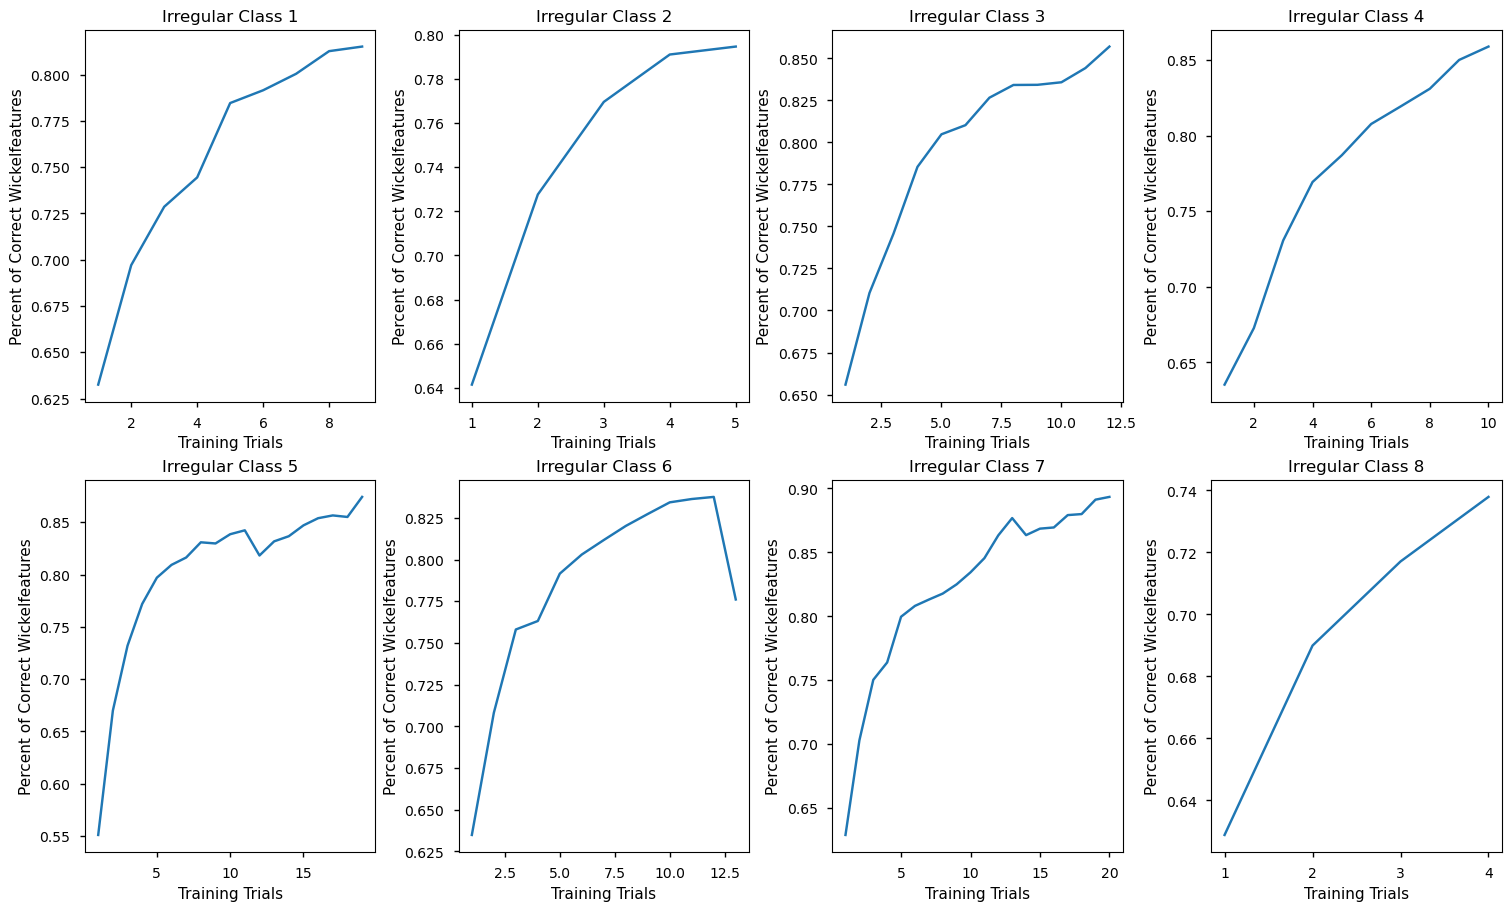

In [33]:
# YOUR CODE HERE


## Plot the learning trajectory for each type of irregular verb.
# Because it's going to look very messy on one single graph, I will plot 8 different graphs

X_values1 = list(range(1, len(scores_class1) + 1))
X_values2 = list(range(1, len(scores_class2) + 1))
X_values3 = list(range(1, len(scores_class3) + 1))
X_values4 = list(range(1, len(scores_class4) + 1))
X_values5 = list(range(1, len(scores_class5) + 1))
X_values6 = list(range(1, len(scores_class6) + 1))
X_values7 = list(range(1, len(scores_class7) + 1))
X_values8 = list(range(1, len(scores_class8) + 1))

figure, axes = plt.subplots( 2 , 4 , figsize = (15,9), constrained_layout = True)
axes[0,0].plot(X_values1, scores_class1)
axes[0,0].set_xlabel("Training Trials")
axes[0,0].set_ylabel("Percent of Correct Wickelfeatures")
axes[0,0].set_title("Irregular Class 1")

axes[0,1].plot(X_values2, scores_class2)
axes[0,1].set_xlabel("Training Trials")
axes[0,1].set_ylabel("Percent of Correct Wickelfeatures")
axes[0,1].set_title("Irregular Class 2")

axes[0,2].plot(X_values3, scores_class3)
axes[0,2].set_xlabel("Training Trials")
axes[0,2].set_ylabel("Percent of Correct Wickelfeatures")
axes[0,2].set_title("Irregular Class 3")

axes[0,3].plot(X_values4, scores_class4)
axes[0,3].set_xlabel("Training Trials")
axes[0,3].set_ylabel("Percent of Correct Wickelfeatures")
axes[0,3].set_title("Irregular Class 4")

axes[1,0].plot(X_values5, scores_class5)
axes[1,0].set_xlabel("Training Trials")
axes[1,0].set_ylabel("Percent of Correct Wickelfeatures")
axes[1,0].set_title("Irregular Class 5")

axes[1,1].plot(X_values6, scores_class6)
axes[1,1].set_xlabel("Training Trials")
axes[1,1].set_ylabel("Percent of Correct Wickelfeatures")
axes[1,1].set_title("Irregular Class 6")

axes[1,2].plot(X_values7, scores_class7)
axes[1,2].set_xlabel("Training Trials")
axes[1,2].set_ylabel("Percent of Correct Wickelfeatures")
axes[1,2].set_title("Irregular Class 7")

axes[1,3].plot(X_values8, scores_class8)
axes[1,3].set_xlabel("Training Trials")
axes[1,3].set_ylabel("Percent of Correct Wickelfeatures")
axes[1,3].set_title("Irregular Class 8")


Discussion:

The above figure indicates that the new RM models mostly fail to demonstrate U-shaped learning behavior across the eight categories of irregular verbs. We do see that the U-shaped pattern is somewhat noticable in class 5 and 7 (mostly class 5), but the other classes of irregular verbs do not reflect this phenomenon, presenting inconsistency.

The inability to consistently replicate the U-shaped learning curve could stem from the fragile nature of the model's training regime. As previously discussed, the model's inherent weakness in its training methodology means that any modifications to the training protocol can lead to significantly far-off results from our expectation. For example, by training and categorizing verbs in irregular classes instead of frequency in this instance led to results that diverge from the anticipated U-shaped behavior. 

However, my doubts regarding the model's outputs arises from the minimal data provided for each class of irregular verbs. That is, the inconsistency might be possibly because the corpus of verbs in some of the categories is relatively small, leaving the model with insufficient data to progress to the second stage of U-shaped learning. Thus, we do not know if the model would produce satisfying outputs if more inputs/verbs were provided for training.

Despite these limitations, the model is still valuable for setting a foundation for further research and modifications, offering insights into the U-shaped learning phenomenon for irregular verbs. It represents the extreme of a 'no rules, all memory' approach and is sufficiently explicit to enable the formulation of testable predictions.

## Experimental Predictions

<div class="alert alert-info" role="alert">
<h1>Exercise 7)</h1>
<p>
    
In addition to matching developmental patterns, connectionist models of the past tense can be used to make predictions for behavioral experiments. For example, we could present participants with novel verbs (e.g., *sweek*) and ask them to provide the past tense for those verbs to see if they follow the rules of generalize based on similarity. Before we conduct the experiment though, we can use RM's model to make predictions about how people should generate past tense forms. The goal of this exercise is to generate predictions for such an experiment.
    
(Points 13)

</p>
</div>


- Construct a set of 20 novel verbs along with their regular past tense and a plausible irregular past tense form (e.g., *sweek*, *sweeked*, *swoke*)
- Use a trained RM perceptron model to score both irregular/regular past tense forms
- Plot the model predictions
- Discuss the predictions, which means for each verb STATE which past tense form is most predicted by the model, STATE if you find the model's prediction surprising and STATE why you think the model made that prediction (250 words max).
- Based on the model predictions, discuss if this is a good experiment for testing whether rules or similarity underly the generation of past tense forms (250 words max).

Above all else clarity is imperative. Comment all your code so that we can understand what you are doing. Make sure all your plots are legible. Just as in the real world, if it's brilliant but nobody can understand it, it won't get you anywhere.


In [34]:
# YOUR CODE HERE
# defining a list of 20 novel words that are not in the original corpus of verbs, with their base and regular/irregular past tense.
novel_verbs = [['jump','jump', 'jumped', 'jumpen'],
               ['sweek','sweek','sweeked','swoke'],
               ['rain', 'rain', 'rained', 'roin'],
               ['start', 'start','started', 'stought'],
               ['cook', 'kook', 'kooked', 'kook'],
               ['follow', 'follow', 'followed', 'follew'],
               ['prepare', 'prepare','prepared', 'prepare'],
               ['wait', 'wait', 'waited', 'waiten'],
               ['move', 'move','moved','monve'],
               ['wash', 'wash','washed','wash'],
               ['enjoy', 'enjoy', 'enjoyed', 'enjoy'],
               ['forget', 'forget','forgeted','forgot'],
               ['begin', 'begin', 'beginned','began'],
               ['win','win','winned','won'],
               ['eat','eat','eated','ate'],
               ['lie','lie','lied','lay'],
               ['die','die','died','die'],
               ['sin','sin','sinned','sin'],
               ['trip','trip','tripped','tripot'],
               ['flip','flip','flipped','flop']
              ]

novel_base = []
novel_regular = []
novel_irregular = []

for verb_details in novel_verbs:
    novel_base.append(verb_details[1])
    novel_regular.append(verb_details[2])
    novel_irregular.append(verb_details[3])


novel_wickel_base = np.array([activate_word(w) for w in novel_base]).T
novel_wickel_regular = np.array([activate_word(w) for w in novel_regular]).T
novel_wickel_irregular = np.array([activate_word(w) for w in novel_irregular]).T


# use the trained perceptrion 'percept' from previous exercises to score both irregular/regular past tense forms

regular_scores = percept.score(novel_wickel_base,novel_wickel_regular)
irregular_scores = percept.score(novel_wickel_base,novel_wickel_irregular)

print(regular_scores)

[0.90652174 0.88478261 0.88478261 0.9173913  0.89782609 0.87826087
 0.8826087  0.91304348 0.88913043 0.86521739 0.84347826 0.90217391
 0.86086957 0.86956522 0.89130435 0.87608696 0.89130435 0.87173913
 0.90652174 0.91086957]


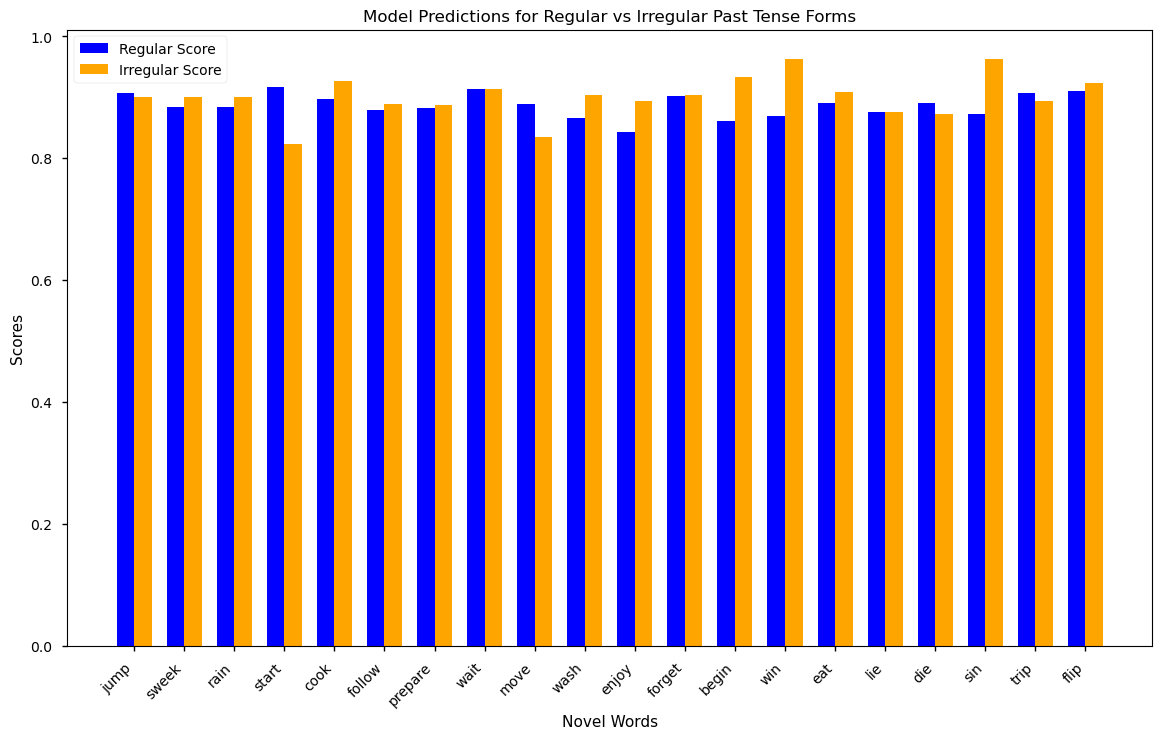

In [35]:
# YOUR CODE HERE

# Plot the model predictions

actual_verbs = []


for verb_details in novel_verbs:
    actual_verbs.append(verb_details[0])


width = 0.35
x = np.arange(len(actual_verbs))

# Create a bar graph
plt.figure(figsize=(14, 8))  
plt.bar(x - width / 2, regular_scores, width, label='Regular Score', color='blue')
plt.bar(x + width / 2, irregular_scores, width, label='Irregular Score', color='orange')

# Add title and labels
plt.title('Model Predictions for Regular vs Irregular Past Tense Forms')
plt.xlabel('Novel Words')
plt.ylabel('Scores')
plt.xticks(x, actual_verbs, rotation=45, ha='right')
plt.legend()

figure.tight_layout()


Discuss the predictions, which means for each verb STATE which past tense form is most predicted by the model, STATE if you find the model's prediction surprising and STATE why you think the model made that prediction (250 words max).

1. For 'jump', the model predicts the regular past tense. I don't find it surprising because the irregular past tense is not very plausible compared to the regular past tense. The irregular past tense does not belong to any of the 8 classes of irregular verbs either, so it's not really a surprise that it's not predicted.
2. For 'sweek' the irregular past tense is predicted. I sort of expected it because an internal vowel change from 'e' to 'o' (one of the irregular classes) made more sense than just adding 'ed'.
3. For 'rain' the model predicts the irregular past tense. Quite surprising to be honest because it is very unusual to have an internal vowel change from 'a' to 'o'. 
4. For 'start' model predicts the regular past tense. Not surprising because the irregular verb form requires a lot of transformation and addition of characters, which is unusual.
5. For 'cook', the model predicts the irregular past tense form. This is quite unexpected as the verb 'cook' typically follows the regular conjugation pattern by adding 'ed' to form the past tense, which is a common rule for regular verbs in English. 
6. For 'follow', the irregular past tense is predicted by the model, which is again, quite surprising. 'Followed' is the correct past tense form and aligns with the regular verb pattern of adding 'ed' to the base form. The irregular form 'follew' does not correspond to any standard irregular verb pattern and would be an unconventional formation in English.
7. For 'prepare', the model predicts the iregular identical past tense 'prepare'. This is surprising as 'prepare' falls into the category of regular verbs that take the 'ed' ending to form the past tense. However, I assume the model made this prediction because the data used to train the model contained quite a few irregular verbs that had their base form being the same as past tense form, which results in overgeneralization of this not-so-general rule.
8. For 'wait', the model correctly predicts the regular past tense 'waited'. It is not surprising because 'waited' follows the usual pattern of adding 'ed' to the base form for regular verbs, whereas the irregular form 'waiten' is not a recognized past tense formation in English.
9. For 'move', the regular past tense 'moved' is predicted. This is expected as 'move' conforms to the regular pattern of adding 'd' after a final vowel, and the irregular form 'monve' does not follow any recognizable irregular verb conjugation patterns in English.
10. For 'wash', the model predicts the irregular past tense 'wash', which is surprising, but I assume the model made this prediction for the same reason as 'prepare'.
11. For 'enjoy', the model predicts the irregular past tense 'enjoy'. I guess this is because of the same reason as stated before.
12. For 'forget', the model predicts the irregular past tense 'forgot'. This is expected since 'forgot' is the conventional irregular past tense form which is formed by internal vowel change from 'e' to 'o'.
13. For 'begin', the model predicts the irregular past tense 'began'. Expected and unsurprising.
14. For 'win', the irregular past tense 'won' is predicted. This is a correct prediction and not surprising as 'win' is an irregular verb that changes its vowel to form the past tense 'won', fitting into one of the classes of vowel change in irregular verbs.
15. 'Eat' follows with the prediction of the irregular past tense 'ate', which is the correct form. The model's prediction is not surprising because 'eat' is a classic example of an irregular verb that changes its internal vowel to form its past tense.
16. For 'lie', the irregular past tense 'lay' is predicted. This is accurate and expected, as 'lie' is an irregular verb that undergoes a vowel change to form its past tense, which is a recognized pattern among irregular verbs.
17. For 'die', the model predicts the regular past tense 'died'. This is not surprising because 'die' follows the regular verb pattern of adding 'ed' to form its past tense, and 'die' does not fall into any irregular verb conjugation class.
18. For 'sin', the model predicts the irregular past tense 'son'. This is surprising because 'sinned' is the correct regular past tense form, adding 'ned' to the base. 'Son' as a past tense form is highly unconventional and does not follow typical English verb conjugations. The model made this prediction probably because of irregular verb class 6, where internal vowel change 'i' to 'o' takes place.
19. For 'trip', the model predicts the regular past tense 'tripped'. This is expected as 'trip' follows the regular doubling of the final consonant before adding 'ed', which is a standard rule for verbs ending in a single vowel followed by a single consonant.
20. Lastly, for 'flip', the model predicts the irregular past tense 'flop'. This is quite surprising, but could be due to the same reason as explained for 'sin'.





Based on the model predictions, discuss if this is a good experiment for testing whether rules or similarity underly the generation of past tense forms (250 words max).

The model's predictions, as seen in the graph and the list of novel words, indicate a mixed strategy of both rule-based and similarity-based generation of past tense forms. It correctly predicts regular forms for verbs like 'cook', 'follow', 'prepare', and 'wash', which align with the rule-based approach where past tense is typically formed by adding 'ed' to the base form. This suggests that the model has learned the common rule that applies to a significant majority of English verbs.

However, the model's predictions for irregular forms in verbs like 'sweek', 'rain', and 'sin' suggest a reliance on similarity to existing irregular verbs. The model seems to be drawing on phonetic or orthographic similarities to known irregular verbs, such as the vowel change from 'e' to 'o' as in 'sweek' to 'swoke', which is reminiscent of the 'speak' to 'spoke' transformation. This indicates that the model may also be utilizing analogical reasoning, which is the basis of the similarity-based approach.

The presence of surprising irregular predictions for verbs that typically would not be irregular, such as 'rain' to 'roin', could hint at overgeneralization of irregular patterns, a common occurrence when models or learners are trying to apply known patterns to novel situations.

Overall, the experiment does show evidence of both rules and similarity influencing past tense generation. However, the model's occasional false/surprising predictions suggest that it may not have a fully consistent understanding of the underlying principles of English past tense formation. It might be beneficial to refine the model's training on a more balanced dataset of regular and irregular verbs to better capture the nuances of English verb conjugation.